In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

In [3]:
def feature_selection_var(X, threshold=0.0):
    sel = VarianceThreshold(threshold=(threshold * (1 - threshold)))
    fitted_X = sel.fit_transform(X)
    imp_feat = pd.DataFrame(fitted_X)

    return imp_feat

Feature selection from Bag-of-Words features of Movie node

In [4]:
# Feature selection for Movie class 0
movie_class0 = df[df['class'] == 0].drop(['class'], axis = 1)
imp_feat0  = feature_selection_var(movie_class0, threshold=0.942)
imp_feat0

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0
1131,0.0,0.0,0.0,0.0,0.0
1132,0.0,1.0,0.0,0.0,1.0
1133,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Movie class 1
movie_class1 = df[df['class'] == 1].drop(['class'], axis = 1)
imp_feat1 = feature_selection_var(movie_class1, threshold=0.91)
imp_feat1

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1579,0.0,0.0,0.0,0.0,0.0
1580,0.0,0.0,0.0,1.0,1.0
1581,0.0,0.0,0.0,0.0,0.0
1582,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Movie class 2
movie_class2 = df[df['class'] == 2].drop(['class'], axis=1)
imp_feat2 = feature_selection_var(movie_class2, threshold=0.932)
imp_feat2

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1554,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0
1556,0.0,0.0,0.0,0.0,0.0
1557,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [7]:
class_path = '../../../../graph generator/diffusion models/sampled_features_diffusion/no_dependence/tabddpm/imdb/'

In [8]:
sampled0  =  pd.DataFrame(np.load(class_path + 'movie0_tabddpm_variance5.npy',allow_pickle=True))
sampled0.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [9]:
sampled1  = pd.DataFrame(np.load(class_path + 'movie1_tabddpm_variance5.npy',allow_pickle=True))
sampled1.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [10]:
sampled2  = pd.DataFrame(np.load(class_path + 'movie2_tabddpm_variance5.npy',allow_pickle=True))
sampled2.head()

,0,1,2,3,4
0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [11]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [12]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.70710678, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

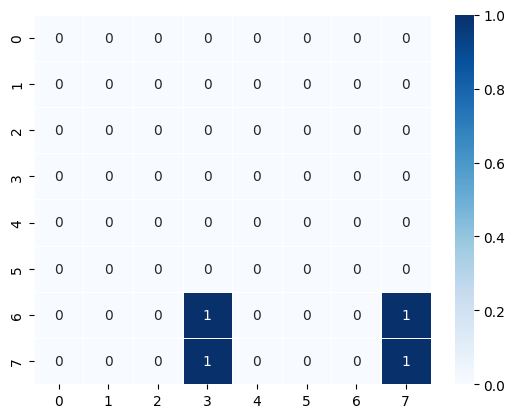

In [13]:
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [14]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.009884195134629225

Movie class 1

In [15]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 0.        , ..., 0.        , 0.70710678,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

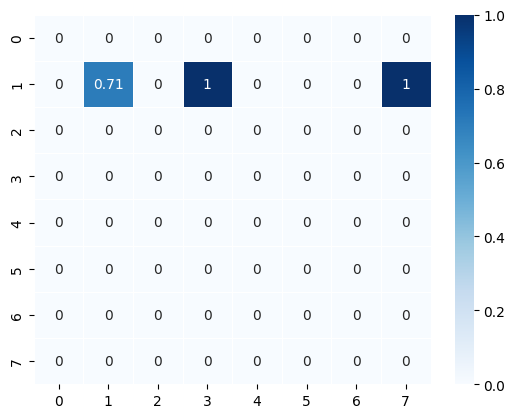

In [16]:
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [17]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.0143118003350803

Movie class 2

In [18]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<AxesSubplot:>

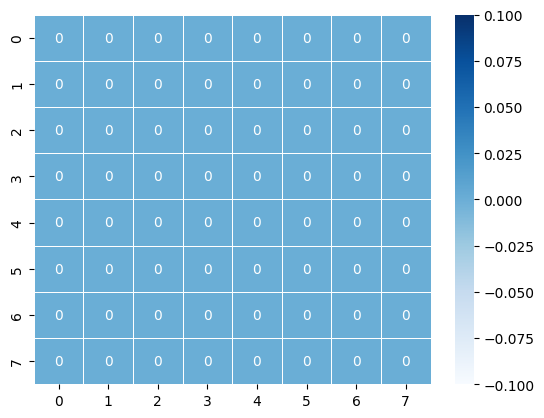

In [19]:
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [20]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.008930994637285665

In [21]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.011042330035665064